In [1]:
import pandas as pd
import math
import random
import CommonMotifProb
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import base64
import datetime
import io

from matplotlib.colors import LogNorm, Normalize

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline

# Accessibility without fitness

In [2]:
def accessibilitySequence(low,high,interval):
    if low==0:
        low=1
    totalseq=[]
    current=low
    totalseq.append(low)
    while current<high:
        current*=interval
        totalseq.append(current)
    return totalseq

In [3]:
access=[1.0/i for i in accessibilitySequence(1,10**20,10) if (1.0/i)<0.001]
gens=[round(i,4) for i in accessibilitySequence(1.0,10**18,2)]
genslabels=["2^"+str(i) for i in range(61)]
numericalAccess=pd.DataFrame(1, columns=genslabels, index=access)

In [4]:
#populate dataframe with values (each mut prob version)
import random
for i in access:
    pop=0
    for j in range(61):
        print(j)
        pop+=int(i*(2**j))
        if pop==0:
            numericalAccess["2^"+str(j)][i]=1
        else:
            numericalAccess["2^"+str(j)][i]=pop
        
        
            
        pop*=2

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
4

In [5]:
#populate dataframe with values
import random
for i in access:
    pop=0
    for j in range(61):
        mutprob=1-((1-i)**(2**j))
        print (2**j,mutprob,int(i*(2**j)))
        randnum=random.random()
        if randnum<mutprob:
            pop+=(i*(2**j))
        
        numericalAccess["2^"+str(j)][i]=pop
            
        pop*=2

1 9.999999999998899e-05 0
2 0.00019998999999992773 0
4 0.00039994000399989904 0
8 0.0007997200559929363 0
16 0.00159880055981787 0
32 0.003195044956405657 0
64 0.006379881600537818 0
128 0.012719060311838892 0
256 0.025276346128461524 0
512 0.04991379858331724 0
1024 0.09733620987761848 0
2048 0.18519808200189725 0
4096 0.3360978344266131 0
8192 0.5592339145469671 0
16384 0.8057252579144097 1
32768 0.9622573245875774 3
65536 0.9985754904527125 6
131072 0.9999979707725497 13
262144 0.9999999999958822 26
524288 1.0 52
1048576 1.0 104
2097152 1.0 209
4194304 1.0 419
8388608 1.0 838
16777216 1.0 1677
33554432 1.0 3355
67108864 1.0 6710
134217728 1.0 13421
268435456 1.0 26843
536870912 1.0 53687
1073741824 1.0 107374
2147483648 1.0 214748
4294967296 1.0 429496
8589934592 1.0 858993
17179869184 1.0 1717986
34359738368 1.0 3435973
68719476736 1.0 6871947
137438953472 1.0 13743895
274877906944 1.0 27487790
549755813888 1.0 54975581
1099511627776 1.0 109951162
2199023255552 1.0 219902325
439804

/var/folders/dt/9s3cdx090n1_ppdzkzk88tx40000gp/T/ipykernel_9506/2543241952.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericalAccess["2^"+str(j)][i]=pop
/var/folders/dt/9s3cdx090n1_ppdzkzk88tx40000gp/T/ipykernel_9506/2543241952.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericalAccess["2^"+str(j)][i]=pop
/var/folders/dt/9s3cdx090n1_ppdzkzk88tx40000gp/T/ipykernel_9506/2543241952.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

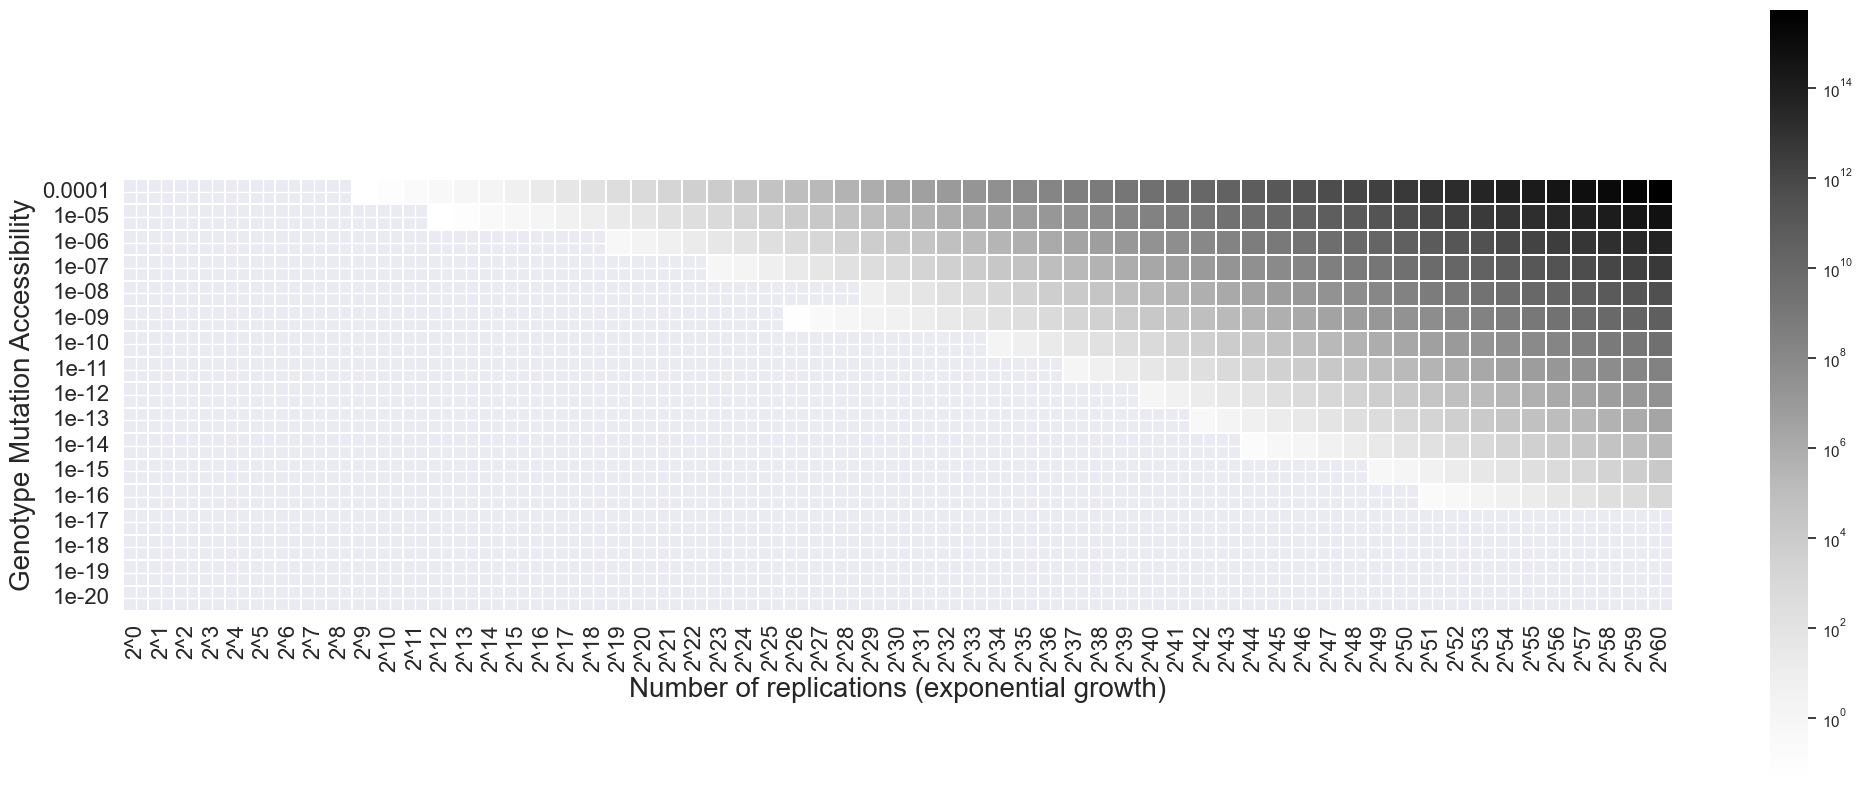

In [6]:

import seaborn as sns; sns.set()
sns.set(rc={'figure.figsize':(25,10)})

ax = sns.heatmap(numericalAccess, cmap="Greys",norm=LogNorm(), linewidths=.2,linecolor='white', square=True)
ax.set_yticklabels(ax.get_yticklabels(),rotation=0)
ax.set_xlabel("Number of replications (exponential growth)",fontsize=20)
ax.set_ylabel("Genotype Mutation Accessibility",fontsize=20)
ax.tick_params(labelsize=16)
plt.savefig('NumericalAccessibilityHeatPlotLogColour.pdf')

# Accessibiilty and fitness together

In [7]:
def relativefitness(percent):
    fitnesslist=[]
    i=1
    while i<6:
        fitnesslist.append(i)
        i*=percent
        
    return fitnesslist

In [8]:
relativefitness(1.1)

[1,
 1.1,
 1.2100000000000002,
 1.3310000000000004,
 1.4641000000000006,
 1.6105100000000008,
 1.771561000000001,
 1.9487171000000014,
 2.1435888100000016,
 2.357947691000002,
 2.5937424601000023,
 2.853116706110003,
 3.1384283767210035,
 3.4522712143931042,
 3.797498335832415,
 4.177248169415656,
 4.594972986357222,
 5.054470284992944,
 5.559917313492239]

In [9]:
access=[1.0/i for i in accessibilitySequence(1,10**16,10) if (1.0/i)<0.001]
fitness=[round(i,2) for i in np.arange(0.9,1.81,0.1)]
print(fitness)
numericalAccessFitness=pd.DataFrame(0.0, columns=fitness, index=access)

[0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8]


In [10]:
dataDICT={}
for i in access:
    dataDICT[i]={}
    for j in fitness:
        print(j)
        dataDICT[i][j]=[]

0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8


In [11]:

#Determine size of subpop at given population size
for m in range(1000):
    for fitnessI in fitness:
        for i in access:
            pop=0
            for j in gens:
                if j<10**15:
                    Gained=False
                    mutprob=1-((1-i)**j)
                    event=random.random()
                    if event<mutprob:
                        Gained=True
                    #if mutprob>=0.1:
                    if Gained:
                        pop+=1
                    pop*=(2.0*fitnessI)
                else:
                    
                    if pop==1:
                        popsave=1
                    else:
                        popsave=pop
                    dataDICT[i][fitnessI].append(popsave)#math.log(popsave)
                    break

In [12]:
for j in gens:
    print(j)

1.0
2.0
4.0
8.0
16.0
32.0
64.0
128.0
256.0
512.0
1024.0
2048.0
4096.0
8192.0
16384.0
32768.0
65536.0
131072.0
262144.0
524288.0
1048576.0
2097152.0
4194304.0
8388608.0
16777216.0
33554432.0
67108864.0
134217728.0
268435456.0
536870912.0
1073741824.0
2147483648.0
4294967296.0
8589934592.0
17179869184.0
34359738368.0
68719476736.0
137438953472.0
274877906944.0
549755813888.0
1099511627776.0
2199023255552.0
4398046511104.0
8796093022208.0
17592186044416.0
35184372088832.0
70368744177664.0
140737488355328.0
281474976710656.0
562949953421312.0
1125899906842624.0
2251799813685248.0
4503599627370496.0
9007199254740992.0
1.8014398509481984e+16
3.602879701896397e+16
7.205759403792794e+16
1.4411518807585587e+17
2.8823037615171174e+17
5.764607523034235e+17
1.152921504606847e+18


In [13]:

#Determine timeline of population growth for a few combinations of accessibility and fitness

#want to do one high access low fitness, high fitness low access, high fitness high access, low fitness low access and two different sets of low access high fitness and high access low fitness
#
strlistfitnessaccess=[]
for fitnessI in fitness:
    for i in access:
        strlistfitnessaccess.append(str(fitnessI)+'-'+str(i))
timeaxs=[i for i in range(100)]

timelistPD=pd.DataFrame(0.0, columns=strlistfitnessaccess, index=timeaxs)
for fitnessI in fitness:
    for i in access:
        pop=0
        WTpop=1
        for m in range(100):
            Gained=False
            mutprob=1-((1-i)**WTpop)
            event=random.random()
            if event<mutprob:
                Gained=True
            #if mutprob>=0.1:
            if Gained:
                pop+=1
            pop*=(2.0*fitnessI)
            timelistPD[str(fitnessI)+'-'+str(i)][m]=pop
            WTpop*=2


In [14]:
filterPD=timelistPD[['1.3-0.0001','1.1-0.0001','1.3-1e-08','1.1-1e-08','1.3-1e-12','1.5-1e-12','1.7-1e-16']]

In [15]:
timelistPD=timelistPD.reset_index()
newPD=timelistPD[timelistPD['index']==50]

In [16]:
for i in newPD:
    if newPD[i].values[0]>10**12 and newPD[i].values[0]<10**14:
        print(i, newPD[i].values[0])

1.1-0.0001 14176183559709.762
1.1-1e-05 1770252692269.8435
1.2-1e-05 14496575582876.594
1.2-1e-06 1048652747602.3302
1.3-1e-06 54016232103566.86
1.3-1e-08 3267828332281.4214
1.4-1e-08 9515621210323.697
1.5-1e-07 11438396227479.0
1.5-1e-08 3812798742492.0
1.6-1e-08 1933422539322.0623
1.7-1e-08 8067921879372.765


In [17]:
columns=['fitness','access']
data=[[1.05,0.0001],[1.1,1e-05],[1.2,1e-06],[1.3,1e-07],[1.5,1e-08],[1.8,1e-09]]
testplotPD=pd.DataFrame(data,columns=columns)


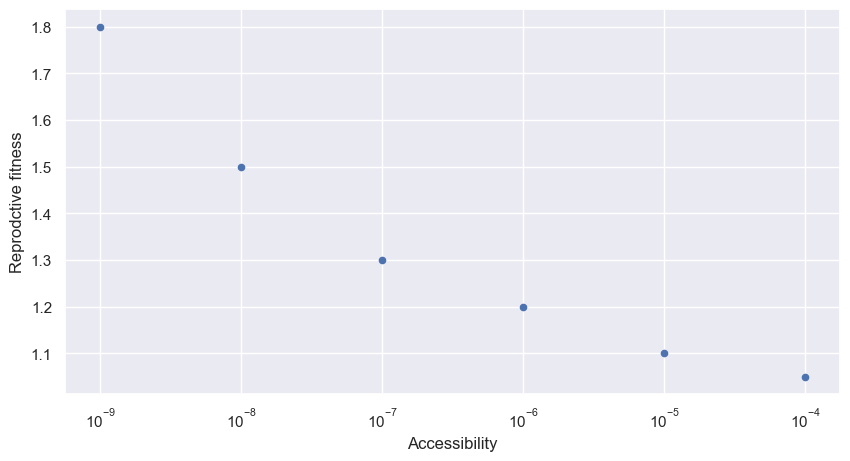

In [18]:
plt.rcParams.update({'font.size': 18})
testplotPD.plot.scatter(x='access',y='fitness',logx=True,figsize=(10,5),xlabel='Accessibility',ylabel='Reprodctive fitness')
plt.savefig('Eqivalence-curve-fitness-access.pdf')

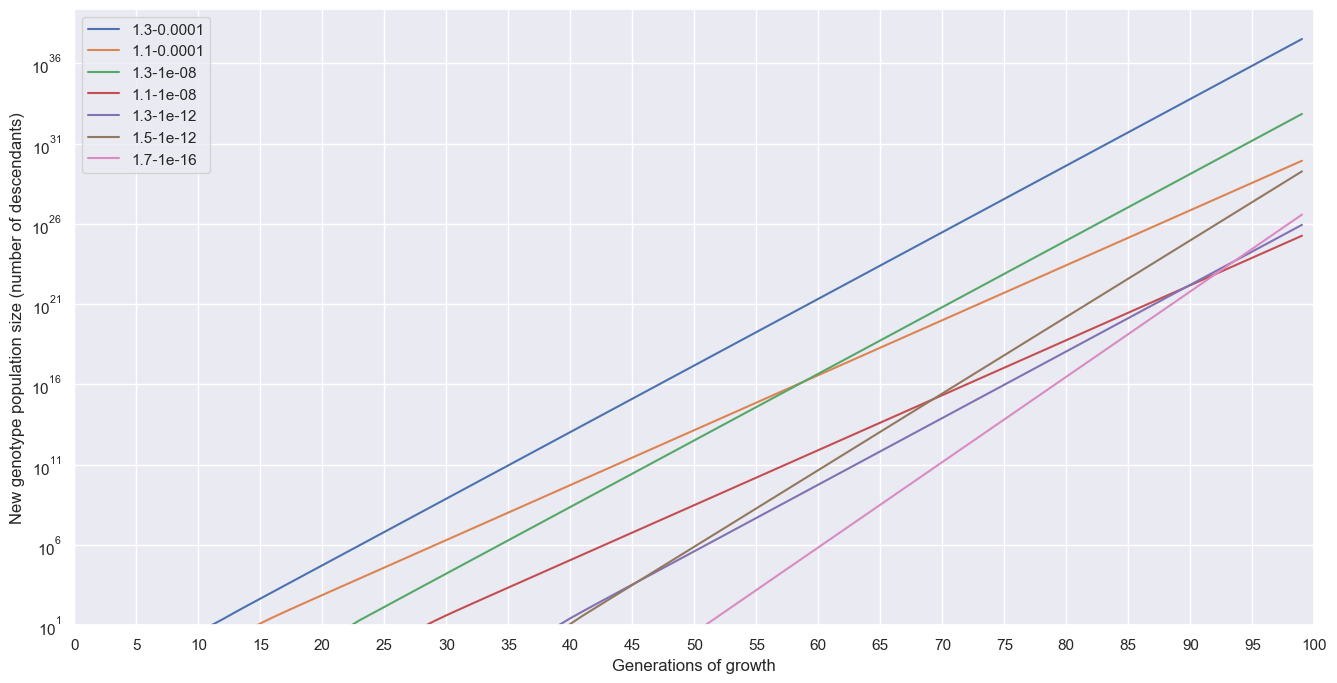

In [19]:
plt.rcParams.update({'font.size': 16})

filterPD.reset_index().plot(x='index',y=['1.3-0.0001','1.1-0.0001','1.3-1e-08','1.1-1e-08','1.3-1e-12','1.5-1e-12','1.7-1e-16'],xlabel='Generations of growth',figsize=(16,8),ylabel='New genotype population size (number of descendants)',logy=True,ylim=10**1,xlim=(0,100),xticks=[i for i in range(0,101,5)])

plt.savefig('Timecourse-fitness-access.pdf')

In [20]:
dataDICT={}
for i in access:
    dataDICT[i]={}
    for j in fitness:
        print(j)
        dataDICT[i][j]=[]

0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8


In [21]:
#Determine how long they all take to reach a certain population
for m in range(10000):
    for fitnessI in fitness:
        for i in access:
            pop=0
            for j in gens:
                if pop<10**6:
                    Gained=False
                    mutprob=1-((1-i)**j)
                    event=random.random()
                    if event<mutprob:
                        Gained=True
                    #if mutprob>=0.1:
                    if Gained:
                        pop+=1
                    pop*=(2.0*fitnessI)
                else:
                    
                    if pop==1:
                        popsave=1
                    else:
                        popsave=pop
                    dataDICT[i][fitnessI].append(j)#math.log(popsave)
                    break

In [22]:
for fitnessI in fitness:
    for i in access:
        number=np.median(dataDICT[i][fitnessI])
        if number==0:
            numericalAccessFitness[fitnessI][i]=number
        else:
            numericalAccessFitness[fitnessI][i]=round(number,2)

/Users/agunnarsson/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/agunnarsson/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


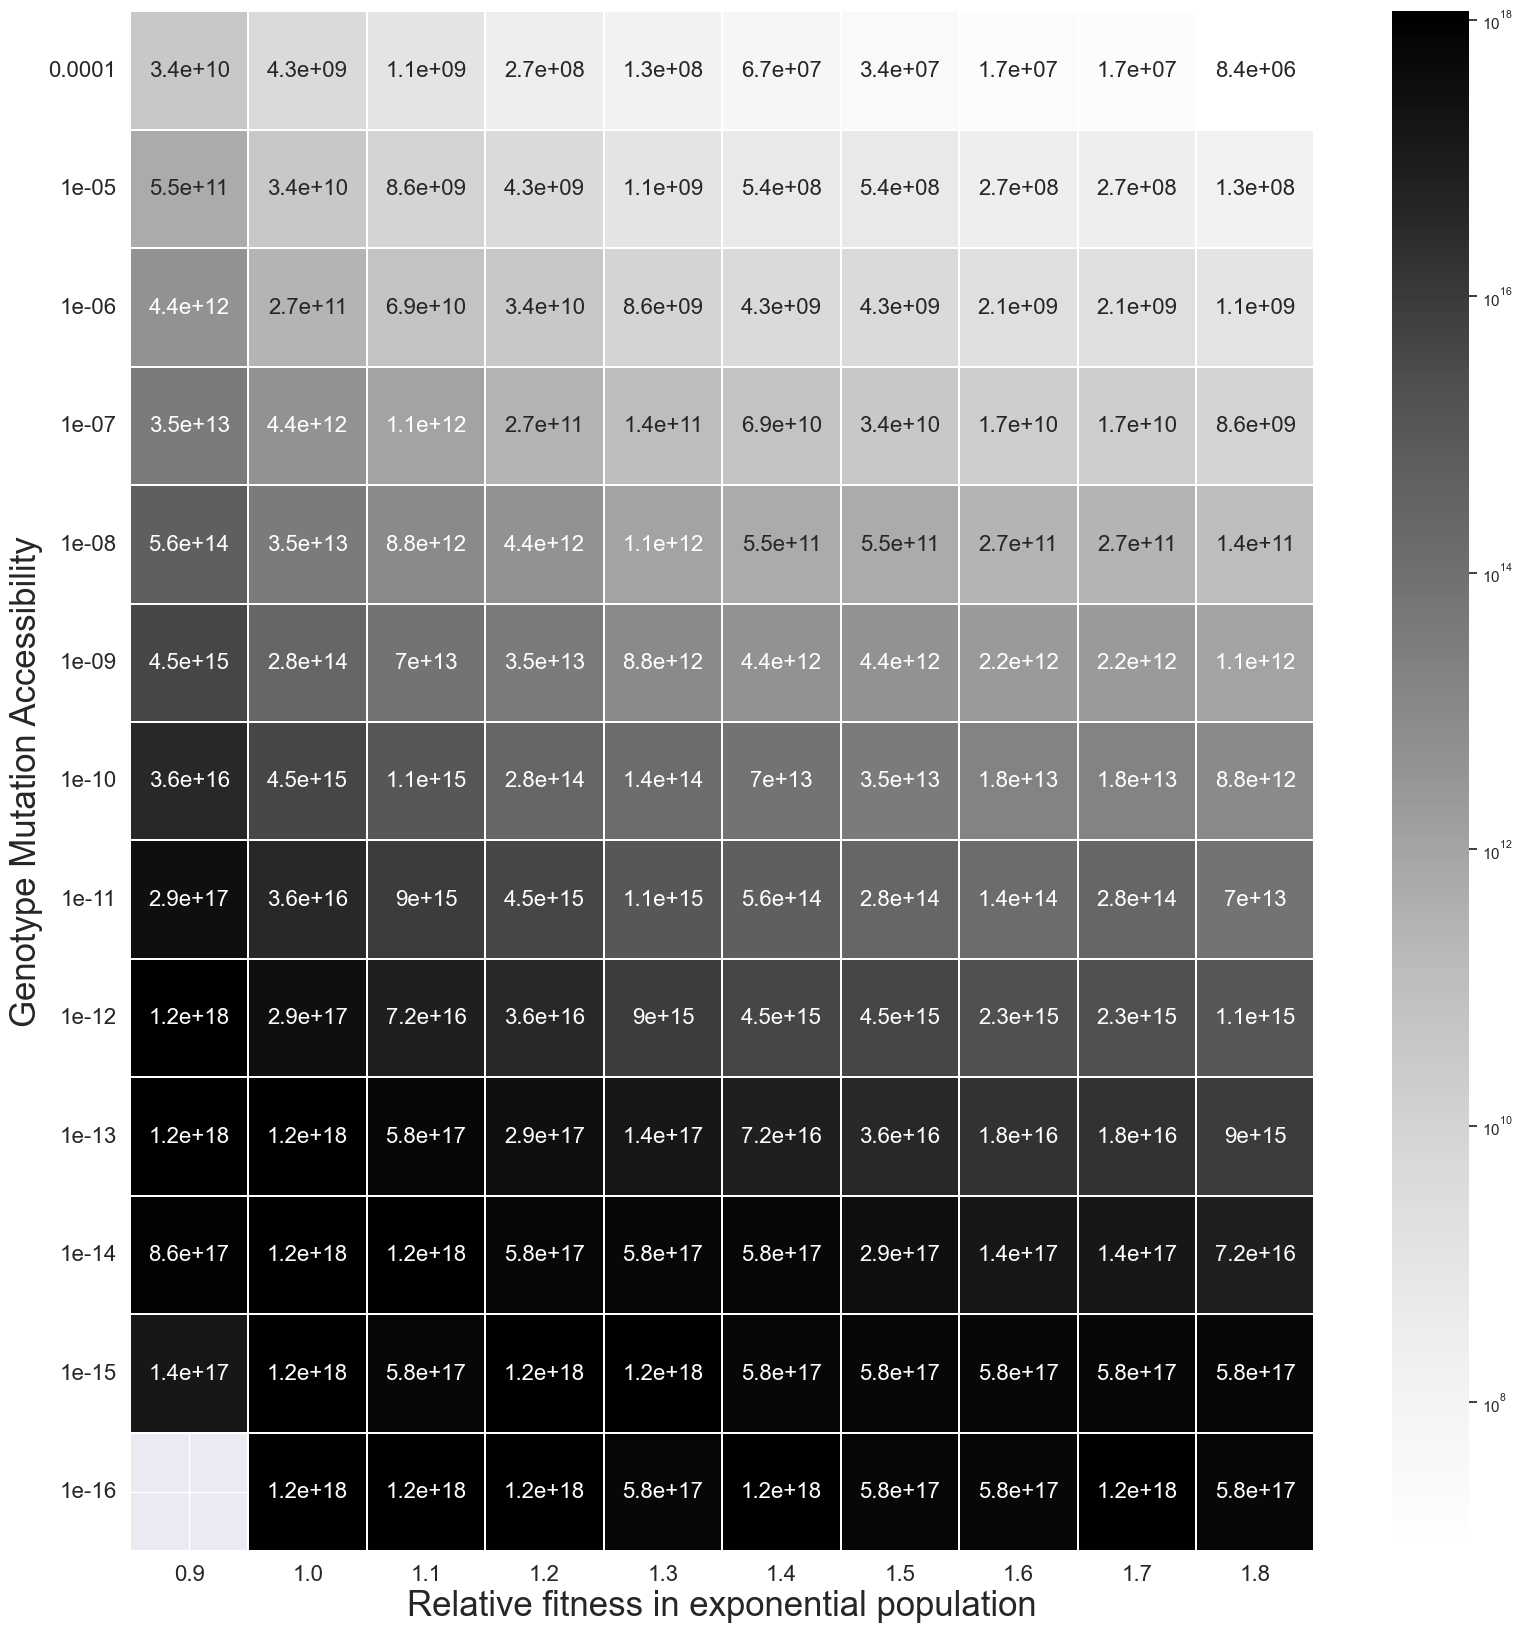

In [23]:
import seaborn as sns; sns.set()

sns.set(rc={'figure.figsize':(20,20),'font.size':16})

ax = sns.heatmap(numericalAccessFitness, cmap="Greys",norm=LogNorm(), linewidths=.2,linecolor='white', square=True, annot=True)
ax.set_yticklabels(ax.get_yticklabels(),rotation=0)
ax.set_xlabel("Relative fitness in exponential population",fontsize=25)
ax.set_ylabel("Genotype Mutation Accessibility",fontsize=25)
ax.tick_params(labelsize=16)
plt.savefig('NumericalAccessibilityandFitnessHeatPlot-full.pdf')